In [1]:
from zipfile import ZipFile
file_name = "/content/drive/MyDrive/Cat & Dog .zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('finish')

finish


In [2]:
import pandas as ps
import matplotlib.pyplot as plt
import numpy as np
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import*

In [5]:
train_datagen = ImageDataGenerator (rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True )

In [6]:
text_datagen = ImageDataGenerator ( rescale = 1./255)

In [12]:
training_set = train_datagen.flow_from_directory ('/content/cats_dogs/train', target_size= (64, 64), batch_size= 32, class_mode= 'binary')

Found 8000 images belonging to 2 classes.


In [17]:
test_set = text_datagen.flow_from_directory ('/content/cats_dogs/test', target_size= (64, 64), batch_size= 32, class_mode= 'binary')

Found 2000 images belonging to 2 classes.


In [27]:
model=Sequential()
model.add(Conv2D(32,(3,3),input_shape=(64,64,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(training_set,epochs=100,steps_per_epoch=8000//32,validation_steps=2000//32,validation_data=test_set)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 29s 95ms/step - accuracy: 0.5406 - loss: 0.6902 - val_accuracy: 0.6568 - val_loss: 0.6379
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 22s 88ms/step - accuracy: 0.6325 - loss: 0.6445 - val_accuracy: 0.7056 - val_loss: 0.5842
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 23s 93ms/step - accuracy: 0.6899 - loss: 0.5945 - val_accuracy: 0.7167 - val_loss: 0.5712
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 41s 163ms/step - accuracy: 0.6838 - loss: 0.5783 - val_accuracy: 0.6719 - val_loss: 0.5897
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 23s 92ms/step - accuracy: 0.7165 - loss: 0.5467 - val_accuracy: 0.7631 - val_loss: 0.5043
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 22s 88ms/step - accuracy: 0.7393 - loss: 0.5286 - val_accuracy: 0.7646 - val_loss: 0.4974
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 22s 87ms/step - accuracy: 0.7452 - loss: 0.5202 - val_accuracy: 0.7671 - val_loss: 0.4923
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 23s 90ms/step - accuracy: 0.7612 - loss: 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
[[0.]]


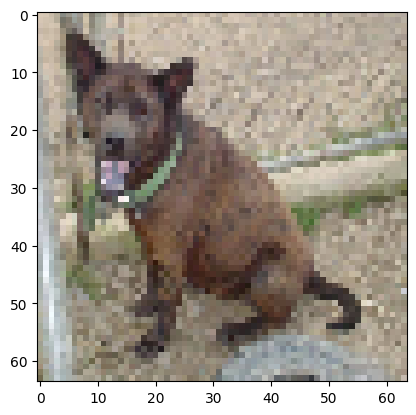

In [32]:
import cv2
import matplotlib.pyplot as plt
img=cv2.imread('/content/cats_dogs/test/dogs/dog.4979.jpg')
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img=cv2.resize(img,(64,64))
print(model.predict(np.array([img])))
plt.imshow(img)
plt.show()

In [33]:
y_true=test_set.classes
y_pred_prob=model.predict(test_set)
y_pred=(y_pred_prob>0.5).astype(int)
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_true,y_pred)
acc=accuracy_score(y_true,y_pred)

63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 149ms/step


In [34]:
acc

0.496

In [35]:
cm

array([[540, 460],
       [548, 452]])